In [0]:
## 확률적 경사 하강법 적용!!!!!!!!!!

import numpy as np

# stochastic
class AdalineSGD(object):
  """
  아달린(적응형 선형 뉴런) 분류기

  매개변수
  ------------
  eta : float
    학습률(0.0 과 1.0 사이)
  n_iter : int
    훈련 데이터의 반복 횟수
  shuffle : bool(default: True)
    each epochs shuffle data
  random_state : int
    가중치 무작위 쵝화를 위한 난수 생성기 시드

  속성
  -------------
  w_ : 1d-array
    학습된 가중치
  errors_ : list
    에포크마다 누적된 분류 오류
  """

  def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    ------------
    X : {array-like}, shape=[n_samples, n_features]
      n개의 샘플과 n개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타겟 값

    return value
    ------------
    self: obejct
    """
    self._initialize_weights(X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)

      cost = []
      # 아달린이랑 다른거 아니야? 
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)

    return self
  
  # 가중치를 다시 초기화하지 않고 훈련데이털르 학습
  def partial_fit(self, X, y):
    if not self.w_initialized:
      self._initialze_weights(X.shape[1])

    # 몰까 이게? 
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    
    return self


  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  # 랜덤한 작은수로 가중치를 초기화 진행
  def _initialize_weights(self, m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost

  #최종 입력 계산
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  # 선형 활성화 계산
  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa & versicolor 
y = df.iloc[0:100, 4].values
print('1: ', y[:5])
print('2: ', y[50:55])

y = np.where(y == 'Iris-setosa', -1, 1)
print('3: ', y[:5])
print('4: ', y[50:55])


1:  ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
2:  ['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
3:  [-1 -1 -1 -1 -1]
4:  [1 1 1 1 1]


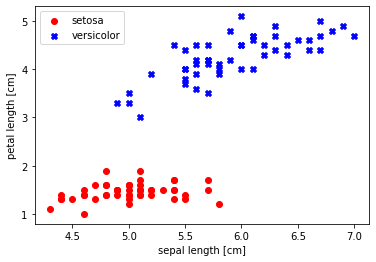

In [6]:
X = df.iloc[0:100, [0, 2]].values

# make scatter
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='X', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setting
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # draw decision_regions
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  # T is transpose
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())


  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha =0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

In [0]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

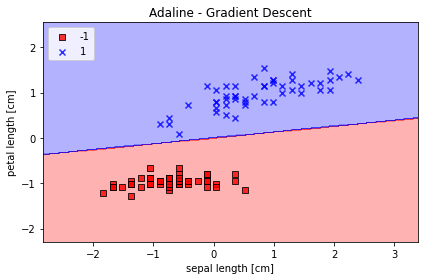

Text(0, 0.5, 'log(Sum-squared-error)')

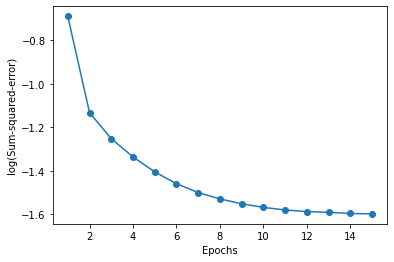

In [16]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')